Нужно придумать небольшую базу данных и написать к ней запросы.
В базе должно быть минимум 4 таблицы и хотя бы две связи вида one-to-many или many-to-many. Можно решить как при помощи pandas, так и при помощи SQL.
Запросы должны быть осмысленными и должны решать какую-то задачу.

Easy
Выгрузить данные и отфильтровать их по какому-то значению.

Normal
Написать запрос на объединение двух или более таблиц, также в запросе должна быть фильтрация

Hard
Написать запрос, который посчитает какую-то сложную аналитику по БД, используя как можно больше таблиц. Построить графики и сделать выводы.

In [185]:
import sqlite3
import pandas as pd

In [186]:
# Создаем таблицу с заказчиками
customers = ["Пиво и Ко", "Холодный берег", "Питерский Хлеб", "Молочные реки", "Мясолюбоф", "Чистый дом", "ИДЕЯ", "ЧистоТайд", "Мороженка"]
customers_df = pd.DataFrame({'name_customer': customers})
customers_df

,name_customer
0,Пиво и Ко
1,Холодный берег
2,Питерский Хлеб
3,Молочные реки
4,Мясолюбоф
5,Чистый дом
6,ИДЕЯ
7,ЧистоТайд
8,Мороженка


In [187]:
from sqlite3 import connect
conn = connect("customers_df.db")

customers_df.to_sql('customers', conn, index_label="id", if_exists="replace")
pd.read_sql("SELECT * FROM customers", conn)



,id,name_customer
0,0,Пиво и Ко
1,1,Холодный берег
2,2,Питерский Хлеб
3,3,Молочные реки
4,4,Мясолюбоф
5,5,Чистый дом
6,6,ИДЕЯ
7,7,ЧистоТайд
8,8,Мороженка


In [188]:
# Создаем таблицу с менеджерами
managers = ["Иванов А.П.", "Петров К.В.", "Сидоров А.А.", "Ефимова А.П"]
managers_df = pd.DataFrame({'name_managers': managers})
managers_df

,name_managers
0,Иванов А.П.
1,Петров К.В.
2,Сидоров А.А.
3,Ефимова А.П


In [189]:
managers_df.to_sql('managers', conn, index_label="id", if_exists="replace")
pd.read_sql("SELECT * FROM managers", conn)

,id,name_managers
0,0,Иванов А.П.
1,1,Петров К.В.
2,2,Сидоров А.А.
3,3,Ефимова А.П


In [190]:
# Создаем таблицу с материалами
materials = ["Бумага", "Самоклеющаяся бумага", "Термоусадка", "Пленка"]
materials_df = pd.DataFrame({'name_materials': materials})
materials_df

,name_materials
0,Бумага
1,Самоклеющаяся бумага
2,Термоусадка
3,Пленка


In [191]:
materials_df.to_sql('materials', conn, index_label="id", if_exists="replace")
pd.read_sql("SELECT * FROM materials", conn)

,id,name_materials
0,0,Бумага
1,1,Самоклеющаяся бумага
2,2,Термоусадка
3,3,Пленка


In [192]:
# Создаем таблицу с Заказами
orders = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14", "15", "16", "17", "18"] # 18 заказов

customers_id = [0, 0, 0, 1, 1, 2, 3, 4, 4, 4, 5, 6, 6, 7, 8, 8, 8, 8]
managers_id =  [3, 1, 1, 2, 3, 0, 2, 3, 3, 2, 2, 3, 3, 3, 0, 0, 2, 2]
value = [670, 540, 460, 799, 480, 650, 570, 518, 312, 234, 567, 334, 355, 890, 242, 555, 234, 678]
products = ["Этикетка Пиво1", "Этикетка Пиво2", "Этикетка Пиво3","Этикетка Мороженное", "Этикетка Мороженное2", "Этикетка Плюшка", "Этикетка Сливки",
            "Этикетка Курица", "Этикетка Говядина", "Этикетка Индейка", "Этикетка Мыло", "Этикетка Стол", "Этикетка Стул", 
            "Этикетка Стиральный порошок", "Этикетка Рожок", "Этикетка Стаканчик", "Этикетка Пломбир", "Этикетка Рожок2",]
materials_id =    ["2", "2", "2","0", "0", "1", "1", "3", "3", "3", "1", "0", "0", "1", "0", "0", "0", "0",]

orders_df = pd.DataFrame({
    'orders': orders,
    'customers_id': customers_id,
    'managers_id': managers_id,
    'value': value,
    'products': products,
    'materials_id': materials_id,
})

orders_df


,orders,customers_id,managers_id,value,products,materials_id
0,1,0,3,670,Этикетка Пиво1,2
1,2,0,1,540,Этикетка Пиво2,2
2,3,0,1,460,Этикетка Пиво3,2
3,4,1,2,799,Этикетка Мороженное,0
4,5,1,3,480,Этикетка Мороженное2,0
5,6,2,0,650,Этикетка Плюшка,1
6,7,3,2,570,Этикетка Сливки,1
7,8,4,3,518,Этикетка Курица,3
8,9,4,3,312,Этикетка Говядина,3
9,10,4,2,234,Этикетка Индейка,3


In [193]:
orders_df.to_sql('orders', conn, index_label="id", if_exists="replace")
pd.read_sql("SELECT * FROM orders", conn)

,id,orders,customers_id,managers_id,value,products,materials_id
0,0,1,0,3,670,Этикетка Пиво1,2
1,1,2,0,1,540,Этикетка Пиво2,2
2,2,3,0,1,460,Этикетка Пиво3,2
3,3,4,1,2,799,Этикетка Мороженное,0
4,4,5,1,3,480,Этикетка Мороженное2,0
5,5,6,2,0,650,Этикетка Плюшка,1
6,6,7,3,2,570,Этикетка Сливки,1
7,7,8,4,3,518,Этикетка Курица,3
8,8,9,4,3,312,Этикетка Говядина,3
9,9,10,4,2,234,Этикетка Индейка,3


Easy Выгрузить данные и отфильтровать их по какому-то значению.

In [194]:
pd.read_sql(
    """
    SELECT * FROM orders
    WHERE value > 500
    """,
    conn)

,id,orders,customers_id,managers_id,value,products,materials_id
0,0,1,0,3,670,Этикетка Пиво1,2
1,1,2,0,1,540,Этикетка Пиво2,2
2,3,4,1,2,799,Этикетка Мороженное,0
3,5,6,2,0,650,Этикетка Плюшка,1
4,6,7,3,2,570,Этикетка Сливки,1
5,7,8,4,3,518,Этикетка Курица,3
6,10,11,5,2,567,Этикетка Мыло,1
7,13,14,7,3,890,Этикетка Стиральный порошок,1
8,15,16,8,0,555,Этикетка Стаканчик,0
9,17,18,8,2,678,Этикетка Рожок2,0


Normal Написать запрос на объединение двух или более таблиц, также в запросе должна быть фильтрация

In [195]:
pd.read_sql(
    """
    SELECT orders, value, products, customers.name_customer, managers.name_managers, materials.name_materials FROM orders
    JOIN customers ON customers_id = customers.id
    JOIN managers ON managers_id = managers.id
    JOIN materials ON materials_id = materials.id
    WHERE name_materials IN ("Бумага", "Термоусадка")
    """,
    conn)

,orders,value,products,name_customer,name_managers,name_materials
0,1,670,Этикетка Пиво1,Пиво и Ко,Ефимова А.П,Термоусадка
1,2,540,Этикетка Пиво2,Пиво и Ко,Петров К.В.,Термоусадка
2,3,460,Этикетка Пиво3,Пиво и Ко,Петров К.В.,Термоусадка
3,4,799,Этикетка Мороженное,Холодный берег,Сидоров А.А.,Бумага
4,5,480,Этикетка Мороженное2,Холодный берег,Ефимова А.П,Бумага
5,12,334,Этикетка Стол,ИДЕЯ,Ефимова А.П,Бумага
6,13,355,Этикетка Стул,ИДЕЯ,Ефимова А.П,Бумага
7,15,242,Этикетка Рожок,Мороженка,Иванов А.П.,Бумага
8,16,555,Этикетка Стаканчик,Мороженка,Иванов А.П.,Бумага
9,17,234,Этикетка Пломбир,Мороженка,Сидоров А.А.,Бумага


Hard Написать запрос, который посчитает какую-то сложную аналитику по БД, используя как можно больше таблиц. Построить графики и сделать выводы.

In [196]:
new_orders = pd.read_sql(
    """
    SELECT COUNT(orders), SUM(value), (SUM(value) / COUNT(orders)) AS average_value, managers.name_managers FROM orders
    JOIN customers ON customers_id = customers.id
    JOIN managers ON managers_id = managers.id
    JOIN materials ON materials_id = materials.id
    WHERE name_materials <> "Пленка"
    GROUP BY name_managers
    """,
    conn)
new_orders

,COUNT(orders),SUM(value),average_value,name_managers
0,5,2729,545,Ефимова А.П
1,3,1447,482,Иванов А.П.
2,2,1000,500,Петров К.В.
3,5,2848,569,Сидоров А.А.


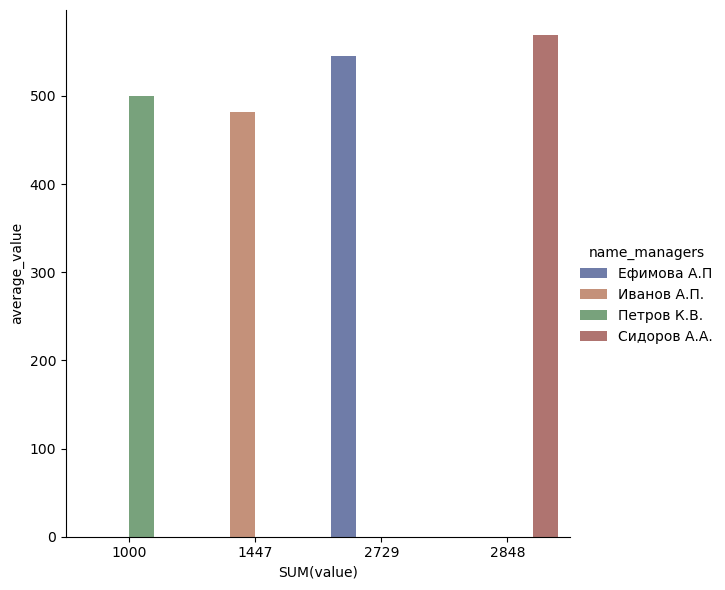

In [197]:
import seaborn as sns
# sns.barplot(x='SUM(value)', y= "average_value",  hue = "name_managers", data=new_orders)
sns.catplot(
    data=new_orders, kind="bar",
    x="SUM(value)", y="average_value", hue = "name_managers",
    errorbar="sd", palette="dark", alpha=.6, height=6
)

Выводы (по материалам, не включая "Пленка").
Из графика видно, что у менеджера Сидоров А.А. лучшие показатели: самая высокая общая стоимость заказов, а также средняя стоимость заказа.
У менеджера Иванов А.П. - самый низкий показатель average_value, возможно, стоит пересмотреть цены на заказы и увеличить стоимость.
У менеджера Петров К.В. - неплохой показатель average_value, но самый низкий SUM(Value). Менеджеру необходимо увеличить количество заказов.